# Load Packages and Data

In [1]:
# Load packages to run Seurat & dittoSeq
library(dittoSeq)
library(dplyr)
library(Seurat)
library(RColorBrewer)
library(ggpubr)
library(compositions)
library(ggplot2)

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    anova, cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [2]:
# Load data from last session: SCP1289 scRNAseq data from all cells
load("covid/covid_norm.RData")

In [3]:
# Create Seurat Object
all_cell_data <- CreateSeuratObject(counts = covid_raw_data)
all_cell_data

An object of class Seurat 
32871 features across 32588 samples within 1 assay 
Active assay: RNA (32871 features, 0 variable features)

In [4]:
# Load metadata
all_meta <- read.delim("covid/T-Cell Visualizations/SCP1289//20210701_NasalSwab_MetaData.txt")
all_meta= all_meta[-1,]
rownames(all_meta) <- all_meta$NAME
head(all_meta)

,NAME,donor_id,Peak_Respiratory_Support_WHO_Score,Bloody_Swab,Percent_Mitochondrial,SARSCoV2_PCR_Status,SARSCoV2_PCR_Status_and_WHO_Score,Cohort_Disease_WHO_Score,biosample_id,SingleCell_SARSCoV2_RNA_Status,⋯,sex,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,age,Coarse_Cell_Annotations,Detailed_Cell_Annotations
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACTCCCGTTCCC_COVID19_Participant13,ACTCCCGTTCCC_COVID19_Participant13,COVID19_Participant13,8,No,2.386278896,pos,pos_8,COVID19_WHO_6-8,WHO_8_COVID19_Participant13,neg,⋯,male,MONDO_0100096,COVID-19,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,30-39,Goblet Cells,AZGP1 high Goblet Cells
TGAAACCTGCAG_COVID19_Participant31,TGAAACCTGCAG_COVID19_Participant31,COVID19_Participant31,6,No,2.755905512,pos,pos_6,COVID19_WHO_6-8,WHO_6_COVID19_Participant31,pos,⋯,male,MONDO_0100096,COVID-19,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,60-69,Goblet Cells,AZGP1 high Goblet Cells
CTTTTGCGCGTG_COVID19_Participant31,CTTTTGCGCGTG_COVID19_Participant31,COVID19_Participant31,6,No,15.77303488,pos,pos_6,COVID19_WHO_6-8,WHO_6_COVID19_Participant31,neg,⋯,male,MONDO_0100096,COVID-19,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,60-69,Goblet Cells,AZGP1 high Goblet Cells
ATGACATTGAAT_COVID19_Participant31,ATGACATTGAAT_COVID19_Participant31,COVID19_Participant31,6,No,1.861824896,pos,pos_6,COVID19_WHO_6-8,WHO_6_COVID19_Participant31,neg,⋯,male,MONDO_0100096,COVID-19,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,60-69,Goblet Cells,AZGP1 high Goblet Cells
TCCCAGACTTTC_COVID19_Participant31,TCCCAGACTTTC_COVID19_Participant31,COVID19_Participant31,6,No,11.98237885,pos,pos_6,COVID19_WHO_6-8,WHO_6_COVID19_Participant31,pos,⋯,male,MONDO_0100096,COVID-19,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,60-69,Goblet Cells,AZGP1 high Goblet Cells
TCCAGCCTCGTA_Control_Participant21,TCCAGCCTCGTA_Control_Participant21,Control_Participant21,8,No,4.767242023,neg,neg_8,Control_WHO_8,WHO_8_Control_Participant21,neg,⋯,female,MONDO_0021113,respiratory failure,UBERON_0001728,nasopharynx,EFO_0008919,Seq-Well,70-79,Goblet Cells,AZGP1 high Goblet Cells


In [5]:
colnames(all_meta)

[1] "NAME"                                        
 [2] "donor_id"                                    
 [3] "Peak_Respiratory_Support_WHO_Score"          
 [4] "Bloody_Swab"                                 
 [5] "Percent_Mitochondrial"                       
 [6] "SARSCoV2_PCR_Status"                         
 [7] "SARSCoV2_PCR_Status_and_WHO_Score"           
 [8] "Cohort_Disease_WHO_Score"                    
 [9] "biosample_id"                                
[10] "SingleCell_SARSCoV2_RNA_Status"              
[11] "SARSCoV2_Unspliced_TRS_Total_Corrected"      
[12] "SARSCoV2_Spliced_TRS_Total_Corrected"        
[13] "SARSCoV2_NegativeStrand_Total_Corrected"     
[14] "SARSCoV2_PositiveStrand_Total_Corrected"     
[15] "SARSCoV2_Total_Corrected"                    
[16] "species"                                     
[17] "species__ontology_label"                     
[18] "sex"                                         
[19] "disease"                                     
[20] "disease__ontology_label"                     
[21] "organ"                                       
[22] "organ__ontology_label"                       
[23] "library_preparation_protocol"                
[24] "library_preparation_protocol__ontology_label"
[25] "age"                                         
[26] "Coarse_Cell_Annotations"                     
[27] "Detailed_Cell_Annotations"

# Seurat Integration + Clustering

In [6]:
groups <- all_meta$SARSCoV2_PCR_Status
names(groups) <- colnames(all_cell_data)
all_cell_data <- AddMetaData(object = all_cell_data, metadata = all_meta)
all_obj.list <- SplitObject(all_cell_data, split.by = "SARSCoV2_PCR_Status")

# normalize and identify variable features for each dataset independently
all_obj.list <- lapply(X = all_obj.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

# select features that are repeatedly variable across datasets for integration
all_features <- SelectIntegrationFeatures(object.list = all_obj.list)

In [7]:
all_immune.anchors <- FindIntegrationAnchors(object.list = all_obj.list, anchor.features = all_features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 29107 anchors

Filtering anchors

	Retained 12289 anchors



In [8]:
# this command creates an 'integrated' data assay
all_immune.combined <- IntegrateData(anchorset = all_immune.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [9]:
DefaultAssay(all_immune.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
all_immune.combined <- ScaleData(all_immune.combined, verbose = FALSE)
all_immune.combined <- RunPCA(all_immune.combined, npcs = 36, verbose = FALSE)

all_immune.combined <- RunUMAP(all_immune.combined, reduction = "pca", dims = 1:36)
all_immune.combined <- FindNeighbors(all_immune.combined, reduction = "pca", dims = 1:36)
all_immune.combined <- FindClusters(all_immune.combined, resolution = 0.4)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:07:16 UMAP embedding parameters a = 0.9922 b = 1.112

12:07:16 Read 32588 rows and found 36 numeric columns

12:07:16 Using Annoy for neighbor search, n_neighbors = 30

12:07:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:07:20 Writing NN index file to temp file /var/folders/ll/kbgcy30x0flfnj6vj0m5xypm0000gn/T//RtmpAofLhM/file1dce531d66c1

12:07:20 Searching Annoy index using 1 thread, search_k = 3000

12:07:30 Annoy recall = 100%

12:07:31 Commencing smooth kNN distance calibra

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32588
Number of edges: 1374810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9185
Number of communities: 19
Elapsed time: 6 seconds


1 singletons identified. 18 final clusters.



In [10]:
DefaultAssay(all_immune.combined) <- "RNA"

In [11]:
all_immune.combined 

An object of class Seurat 
34871 features across 32588 samples within 2 assays 
Active assay: RNA (32871 features, 0 variable features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [12]:
# pdf("12052022_ADAR_allcluster_posneg.pdf",  width = 10, height = 5)
# FeaturePlot(all_immune.combined, features = c("ADAR"), split.by = "SARSCoV2_PCR_Status", max.cutoff = 3,
#     cols = c("grey", "blue"))
# dev.off()

In [13]:
# options(repr.plot.width=8, repr.plot.height=8) 
# pdf("12052022_ADAR_allcluster.pdf",  width = 5, height = 5)
# FeaturePlot(all_immune.combined, features = c("ADAR"), max.cutoff = 3,
#     cols = c("grey", "blue"))
# dev.off()

# dittoSeq Visualizations

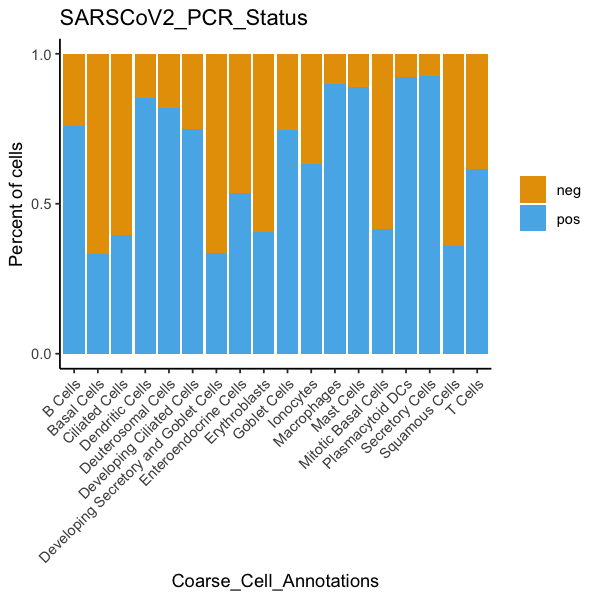

In [14]:
options(repr.plot.width=5, repr.plot.height=5) 
dittoBarPlot(all_immune.combined, "SARSCoV2_PCR_Status", group.by = "Coarse_Cell_Annotations")

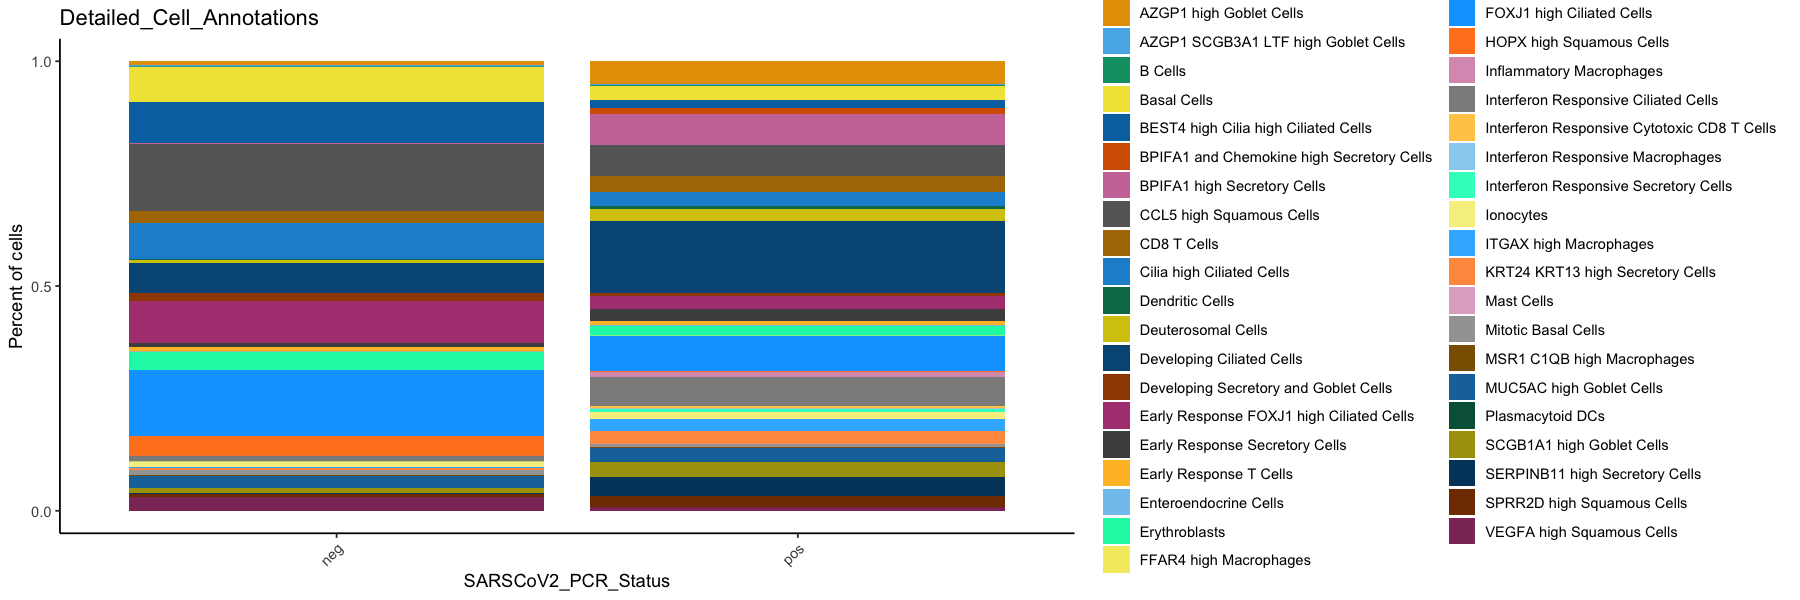

In [15]:
options(repr.plot.width=15, repr.plot.height=5) 
dittoBarPlot(all_immune.combined, "Detailed_Cell_Annotations", group.by = "SARSCoV2_PCR_Status")

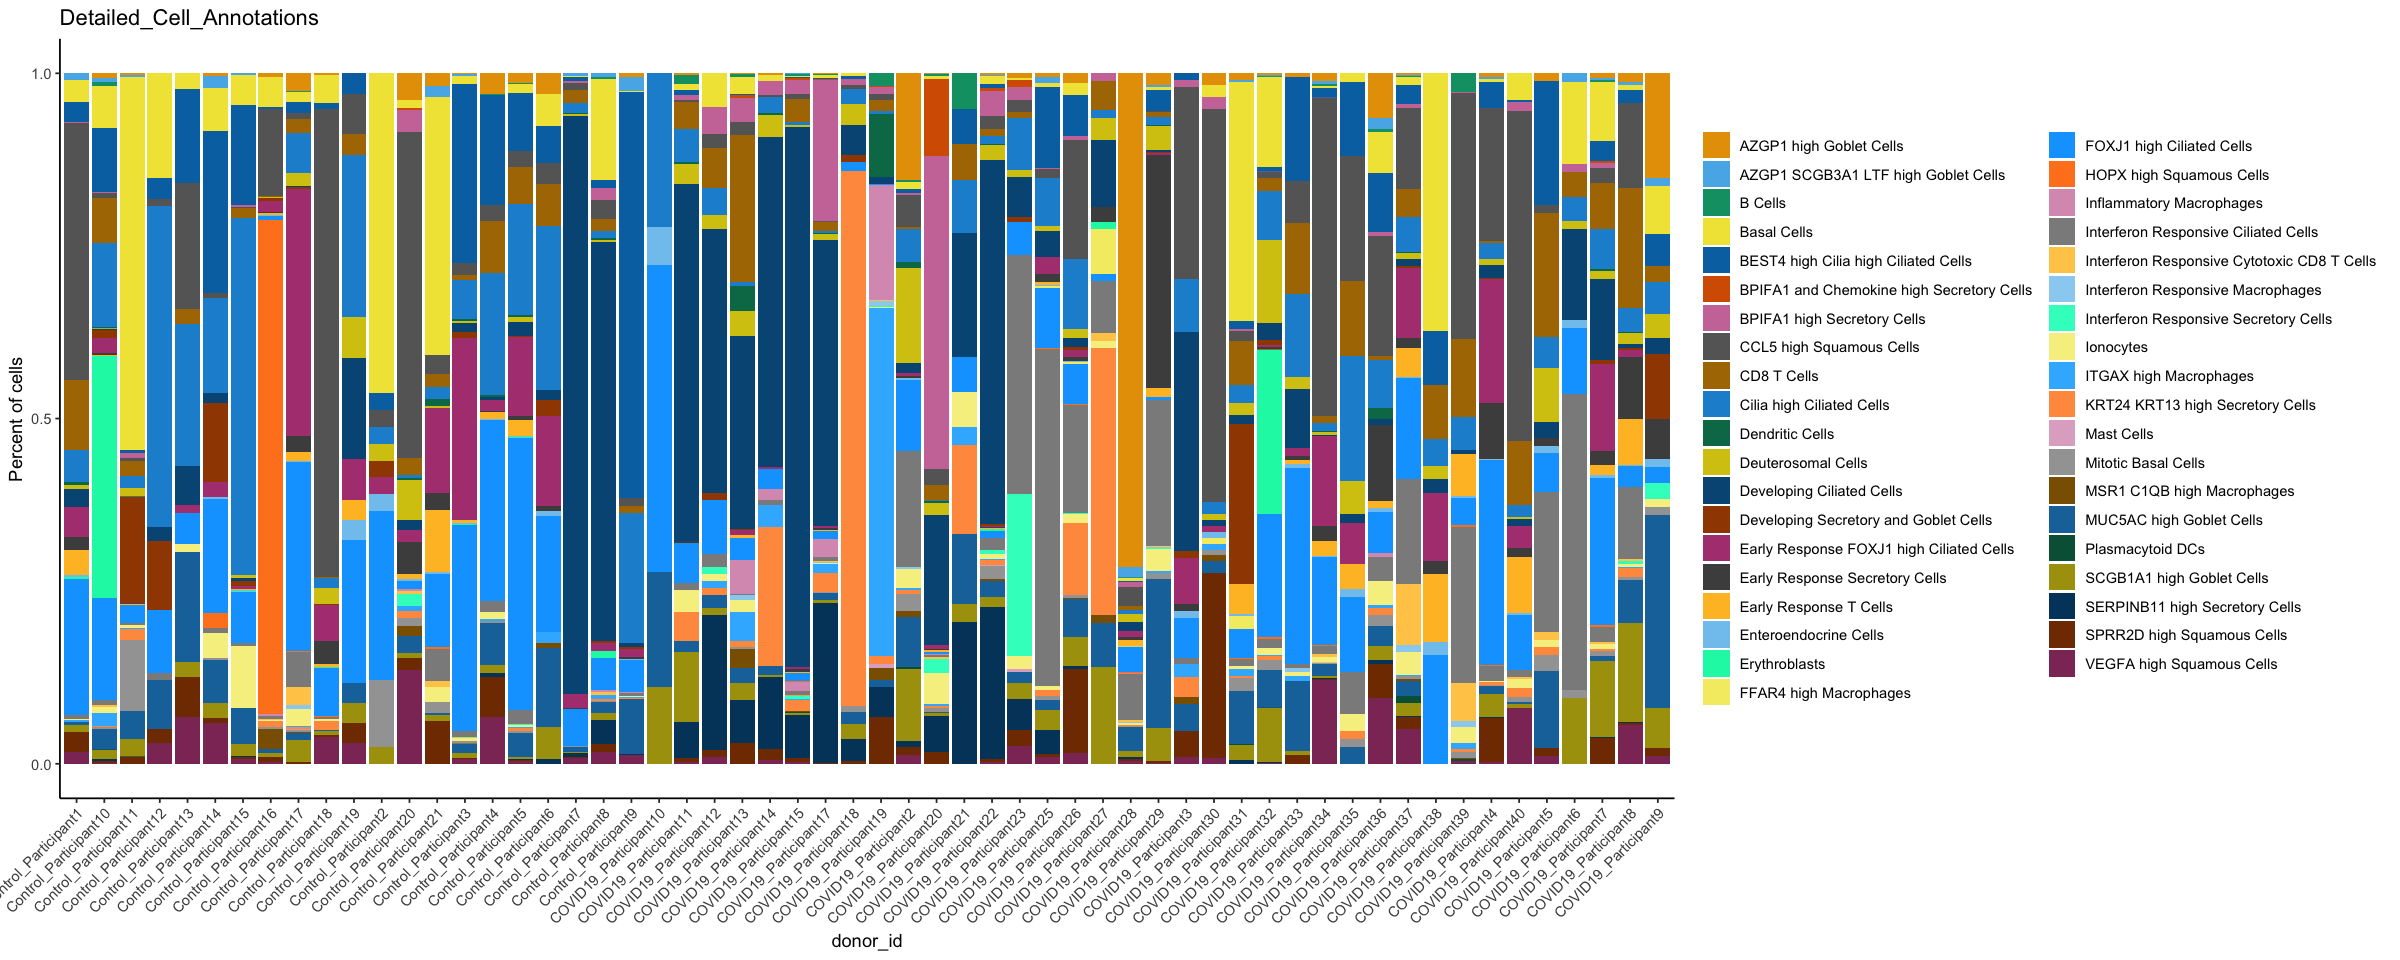

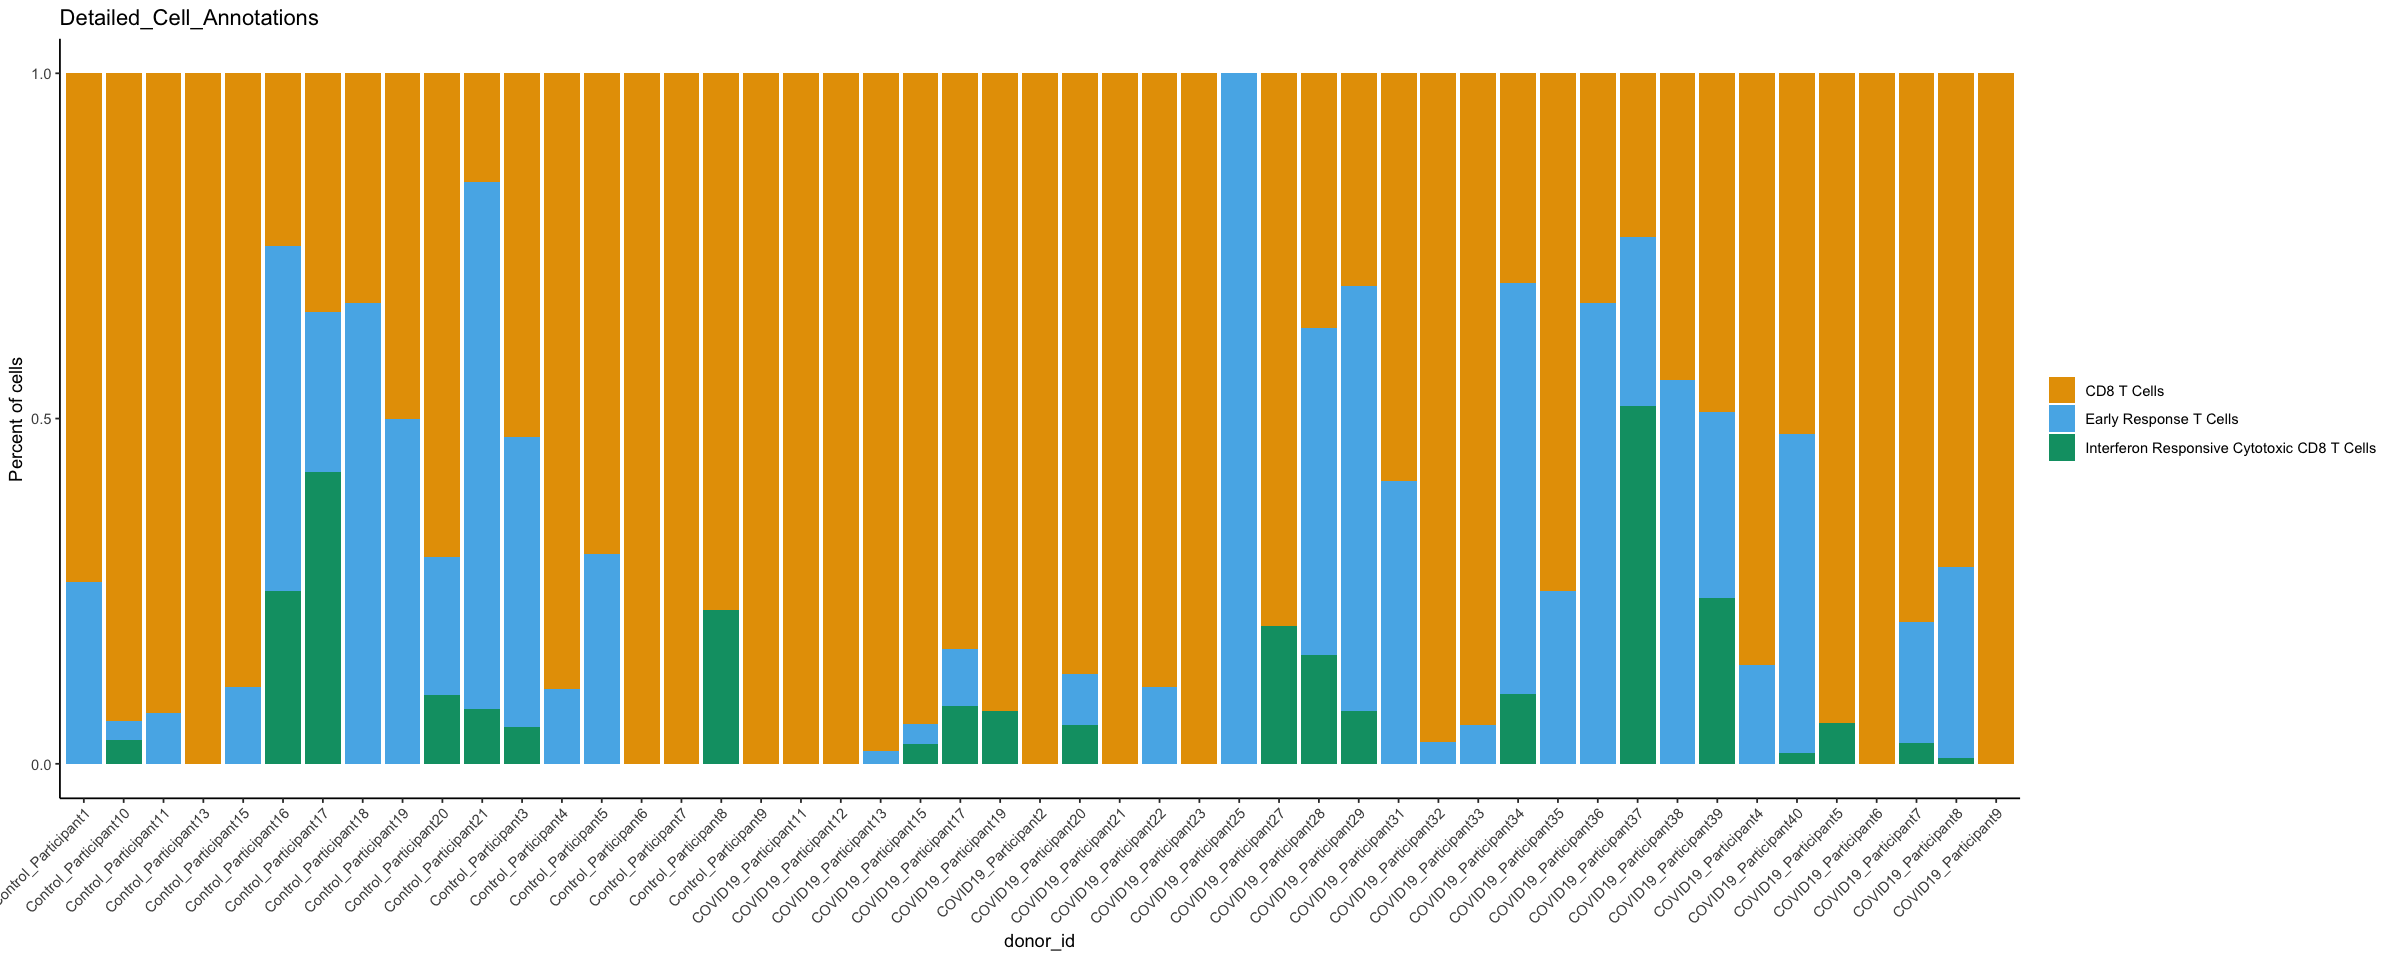

In [16]:
options(repr.plot.width=20, repr.plot.height=8) 
dittoBarPlot(all_immune.combined, "Detailed_Cell_Annotations", group.by = "donor_id")
dittoBarPlot(all_immune.combined, "Detailed_Cell_Annotations", group.by = "donor_id", 
             cells.use = meta("Coarse_Cell_Annotations", all_immune.combined) == "T Cells")


## Stratification of Data by COVID Positivity
- changed the data to be percentage based on the whole sample, not just on the T cells

In [17]:
# Extract all COVID-19 positive cells
samp_pos <- subset(x = all_immune.combined, subset = SARSCoV2_PCR_Status == "pos")
samp_pos

An object of class Seurat 
34871 features across 18073 samples within 2 assays 
Active assay: RNA (32871 features, 0 variable features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [18]:
# Extract all COVID-19 negative cells
samp_neg <- subset(x = all_immune.combined, subset = SARSCoV2_PCR_Status == "neg")
samp_neg

An object of class Seurat 
34871 features across 14515 samples within 2 assays 
Active assay: RNA (32871 features, 0 variable features)
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [19]:
pos <- dittoBarPlot(samp_pos, "Detailed_Cell_Annotations", group.by = "donor_id", data.out = TRUE)

# Include only T Cells
pos_t <- dittoBarPlot(samp_pos, "Detailed_Cell_Annotations", group.by = "donor_id",
            cells.use = meta("Coarse_Cell_Annotations", samp_pos) == "T Cells", data.out = TRUE, 
                      color.panel = c("#9b9fe1", "#efbcdb", "#87cbdd"))

In [20]:
neg <- dittoBarPlot(samp_neg, "Detailed_Cell_Annotations", group.by = "donor_id", data.out = TRUE)
neg_t <- dittoBarPlot(samp_neg, "Detailed_Cell_Annotations", group.by = "donor_id",
            cells.use = meta("Coarse_Cell_Annotations", samp_neg) == "T Cells", 
                            color.panel = c("#9b9fe1", "#efbcdb", "#87cbdd"))

In [21]:
# write.table(pos$data, file = "20240521_Positive_Cluster_Count.txt", sep = "\t", row.names = TRUE)
# write.table(pos_t$data, file = "20240521_Positive_TCell_Count.txt", sep = "\t", row.names = TRUE)

# png("10042022_Pos_CellBreakdown.png",  width = 20, height = 10, units = "in",res=1200)
# print(pos)
# dev.off()

# png("10042022_Pos_TCellBreakdown.png",  width = 20, height = 10, units = "in",res=1200)
# print(pos_t)
# dev.off()

# write.table(neg$data, file = "20240521_Negative_Cluster_Count.txt", sep = "\t", row.names = TRUE)
# write.table(neg_t$data, file = "20240521_Negative_TCell_Count.txt", sep = "\t", row.names = TRUE)

# png("10042022_Neg_CellBreakdown.png",  width = 20, height = 10, units = "in",res=1200)
# neg
# dev.off()

# png("10042022_Neg_TCellBreakdown.png",  width = 20, height = 10, units = "in",res=1200)
# neg_t
# dev.off()

In [22]:
# Perform centered log ratio transformation 
pos$data['covid_status'] = 'pos'
neg$data['covid_status'] = 'neg'
all_cells <- rbind(pos$data, neg$data)

In [23]:
# only keep T cells
all_t_cells <- subset(all_cells, label %in% c("CD8 T Cells", "Interferon Responsive Cytotoxic CD8 T Cells", "Early Response T Cells"))
head(all_t_cells)

,label,grouping,count,label.count.total.per.facet,percent,covid_status
,<fct>,<fct>,<int>,<int>,<dbl>,<chr>
9,CD8 T Cells,COVID19_Participant10,0,18,0.00000000,pos
17,Early Response T Cells,COVID19_Participant10,0,18,0.00000000,pos
25,Interferon Responsive Cytotoxic CD8 T Cells,COVID19_Participant10,0,18,0.00000000,pos
48,CD8 T Cells,COVID19_Participant11,15,382,0.03926702,pos
56,Early Response T Cells,COVID19_Participant11,0,382,0.00000000,pos
64,Interferon Responsive Cytotoxic CD8 T Cells,COVID19_Participant11,0,382,0.00000000,pos


In [24]:
# check for normality
shapiro.test(subset(all_t_cells, covid_status == "pos")$percent)
shapiro.test(subset(all_t_cells, covid_status == "neg")$percent)
shapiro.test(subset(all_t_cells)$percent)


	Shapiro-Wilk normality test

data:  subset(all_t_cells, covid_status == "pos")$percent
W = 0.59479, p-value = 1.411e-15



	Shapiro-Wilk normality test

data:  subset(all_t_cells, covid_status == "neg")$percent
W = 0.63748, p-value = 8.978e-12



	Shapiro-Wilk normality test

data:  subset(all_t_cells)$percent
W = 0.5928, p-value < 2.2e-16


Shapiro-Wilk normality test tests for if a dataset is normally distributed. Since the p-value is less than 0.05, we can assume that our data is normally distributed. Therefore, to perform statistical tests with the data, we must use a Wilcoxon test.

## Analysis with Wilcoxon Test 
- Demonstrates ties. A tie occurs if the same value occurs in both samples, but since the percentage of CD8 T cells are similar between different participants, the same value will occur.

Warning message in wilcox.test.default(c(0, 0.0392670157068063, 0.0588235294117647, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0.00410958904109589, 0, 0.000997008973080758, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0.000997008973080758, 0.00118623962040332, :
“cannot compute exact p-value with ties”


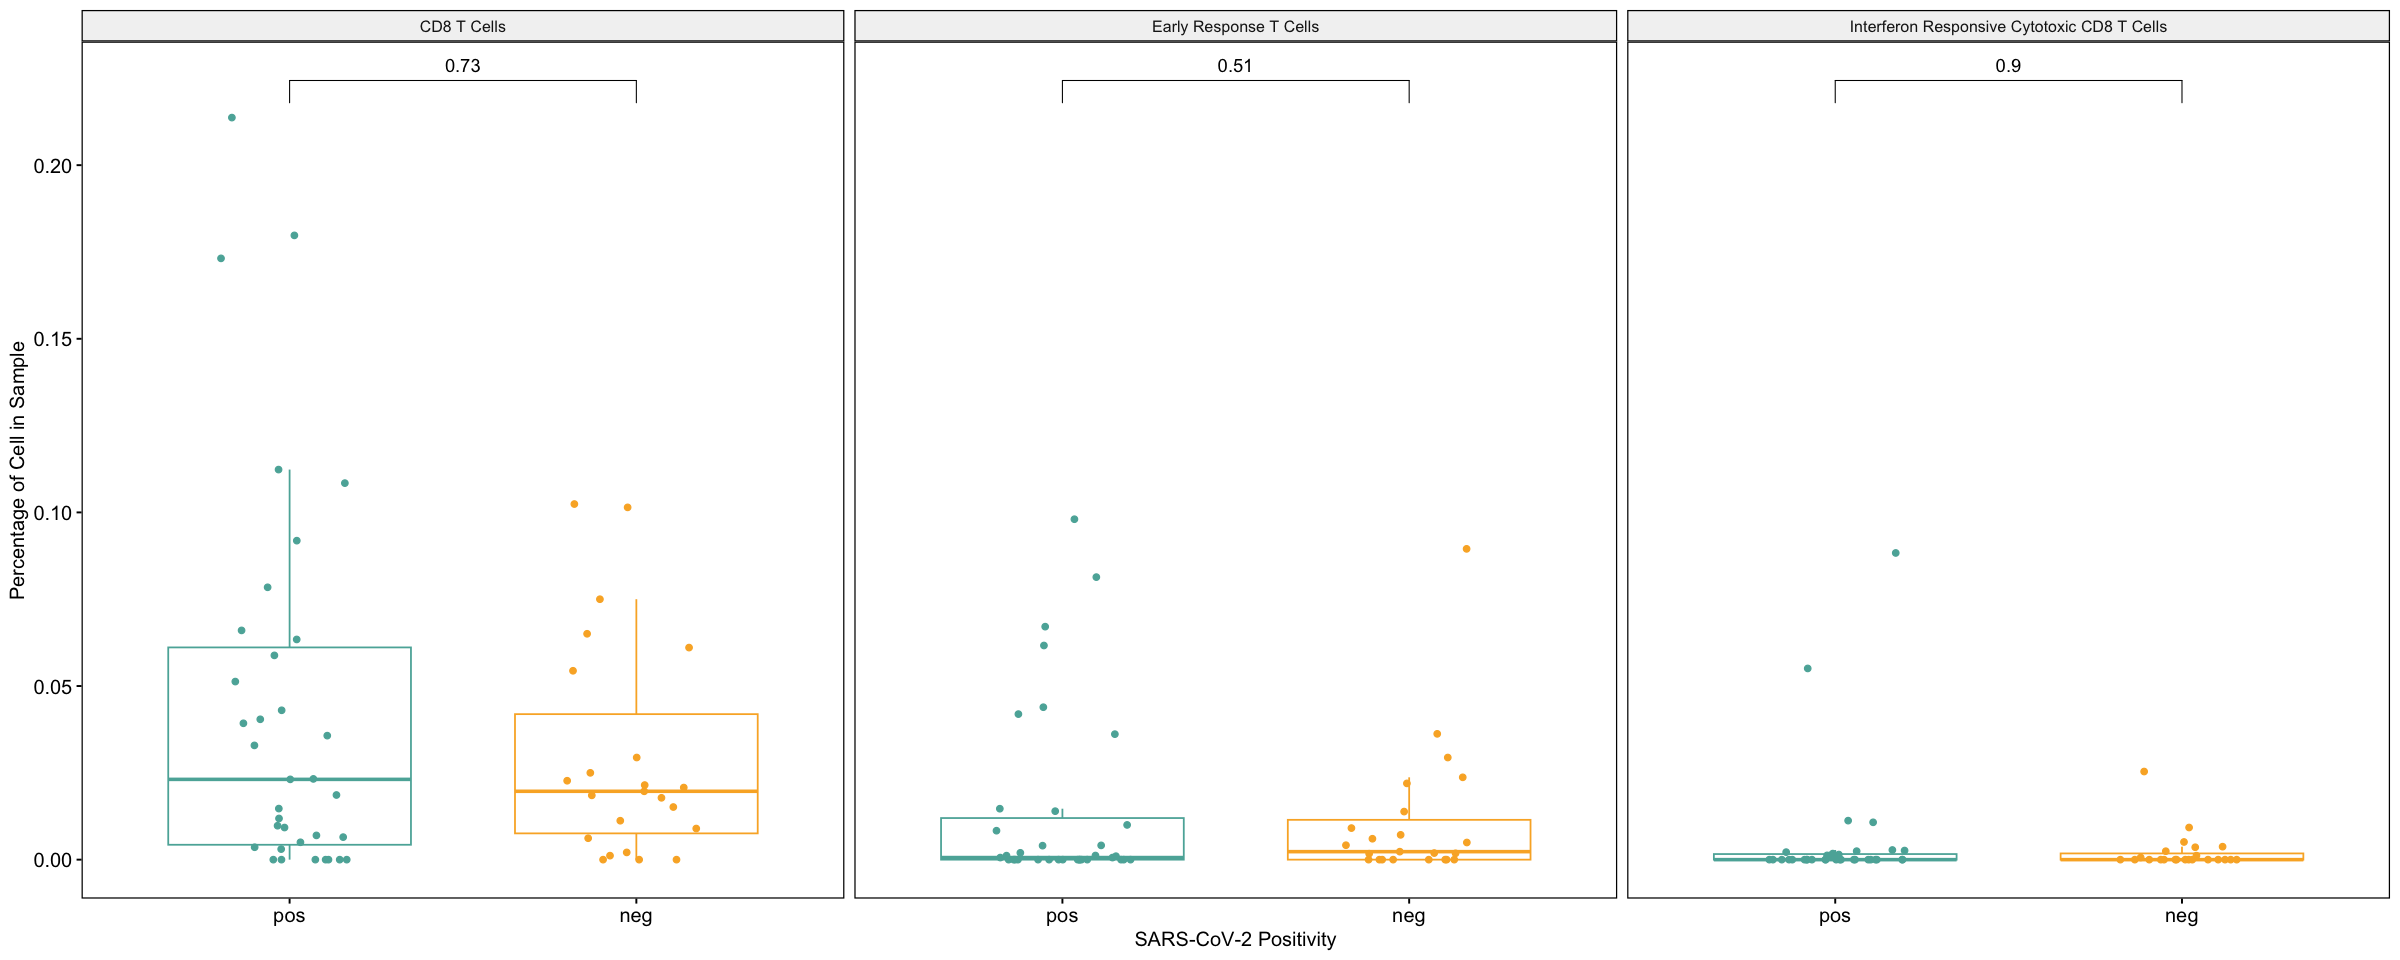

In [25]:
p <- ggboxplot(all_t_cells, x = "covid_status", y = "percent", color = "covid_status", xlab = "SARS-CoV-2 Positivity",
         add = "jitter", facet.by = "label", palette = c('#5bb0a7', '#f9b12e' ), ylab = "Percentage of Cell in Sample")
my_comparisons <- list(c("pos", "neg"))
print(p + stat_compare_means(comparisons = my_comparisons) + theme(legend.position = 'none'))

In [26]:
pdf("20240530_TCell_PosNegBreakdown_Wil.pdf",  width = 10, height = 5)
p <- ggboxplot(all_t_cells, x = "covid_status", y = "percent", color = "covid_status", xlab = "SARS-CoV-2 Positivity",
         add = "jitter", facet.by = "label", palette = c('#5bb0a7', '#f9b12e' ), ylab = "Percentage of Cell in Sample")
my_comparisons <- list(c("pos", "neg"))
print(p + stat_compare_means(comparisons = my_comparisons) + theme(legend.position = 'none'))
dev.off()

Warning message in wilcox.test.default(c(0, 0.0392670157068063, 0.0588235294117647, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0.00410958904109589, 0, 0.000997008973080758, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0.000997008973080758, 0.00118623962040332, :
“cannot compute exact p-value with ties”


pdf 
  2

## Kruskal Test

In [27]:
all_t_cells$covid_status_f = factor(all_t_cells$covid_status, levels=c('pos', 'neg'))


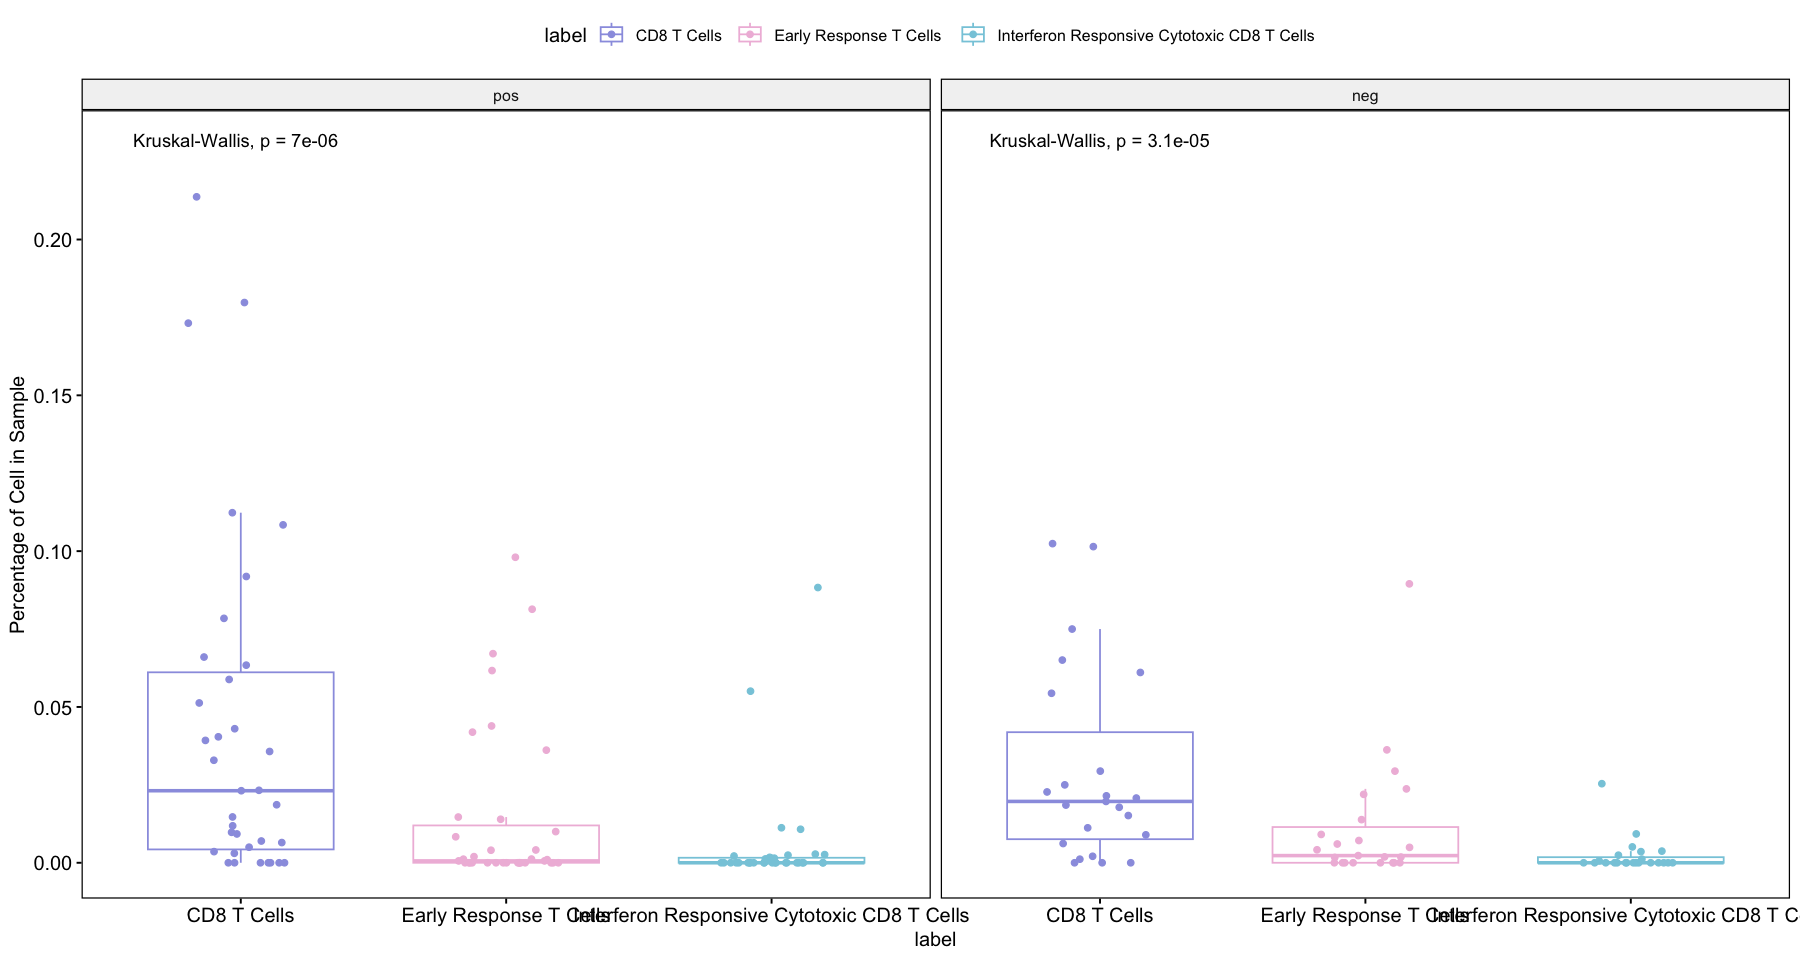

In [28]:
options(repr.plot.width=15, repr.plot.height=8) 

p <- ggboxplot(all_t_cells, x = "label", y = "percent", color = "label", ylab = "Percentage of Cell in Sample", 
         add = "jitter", facet.by = "covid_status_f", palette = c("#9b9fe1", "#efbcdb", "#87cbdd"))
my_comparisons <- list(c("CD8 T Cells", "Early Response T Cells"), 
                       c("Interferon Responsive Cytotoxic CD8 T Cells", "Early Response T Cells"),
                        c("CD8 T Cells", "Interferon Responsive Cytotoxic CD8 T Cells"))
print(p + stat_compare_means(method = "kruskal.test", label.x = 0.75, label.y = 0.23))


In [29]:
pdf("20240529_PosNeg_TCellBreakdown_KW.pdf",  width = 10, height = 5)
p <- ggboxplot(all_t_cells, x = "label", y = "percent", color = "label", ylab = "Percentage of Cell in Sample", 
         add = "jitter", facet.by = "covid_status_f", palette = c("#9b9fe1", "#efbcdb", "#87cbdd"))
my_comparisons <- list(c("CD8 T Cells", "Early Response T Cells"), 
                       c("Interferon Responsive Cytotoxic CD8 T Cells", "Early Response T Cells"),
                        c("CD8 T Cells", "Interferon Responsive Cytotoxic CD8 T Cells"))
print(p + stat_compare_means(method = "kruskal.test", label.x = 0.75, label.y = 0.23) + theme(legend.position = 'none'))

dev.off()

pdf 
  2